Imports

In [ ]:
import pandas as pd
import numpy as np

Upload train.csv, test.csv, sample_submission.csv

In [ ]:
from google.colab import files
files.upload();

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


Save data into variable

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

### DATA ANALISYS

In [ ]:
print(train_data.head())

   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5              1               1.0   22   25   2

FEATURE DISTRIBUTION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

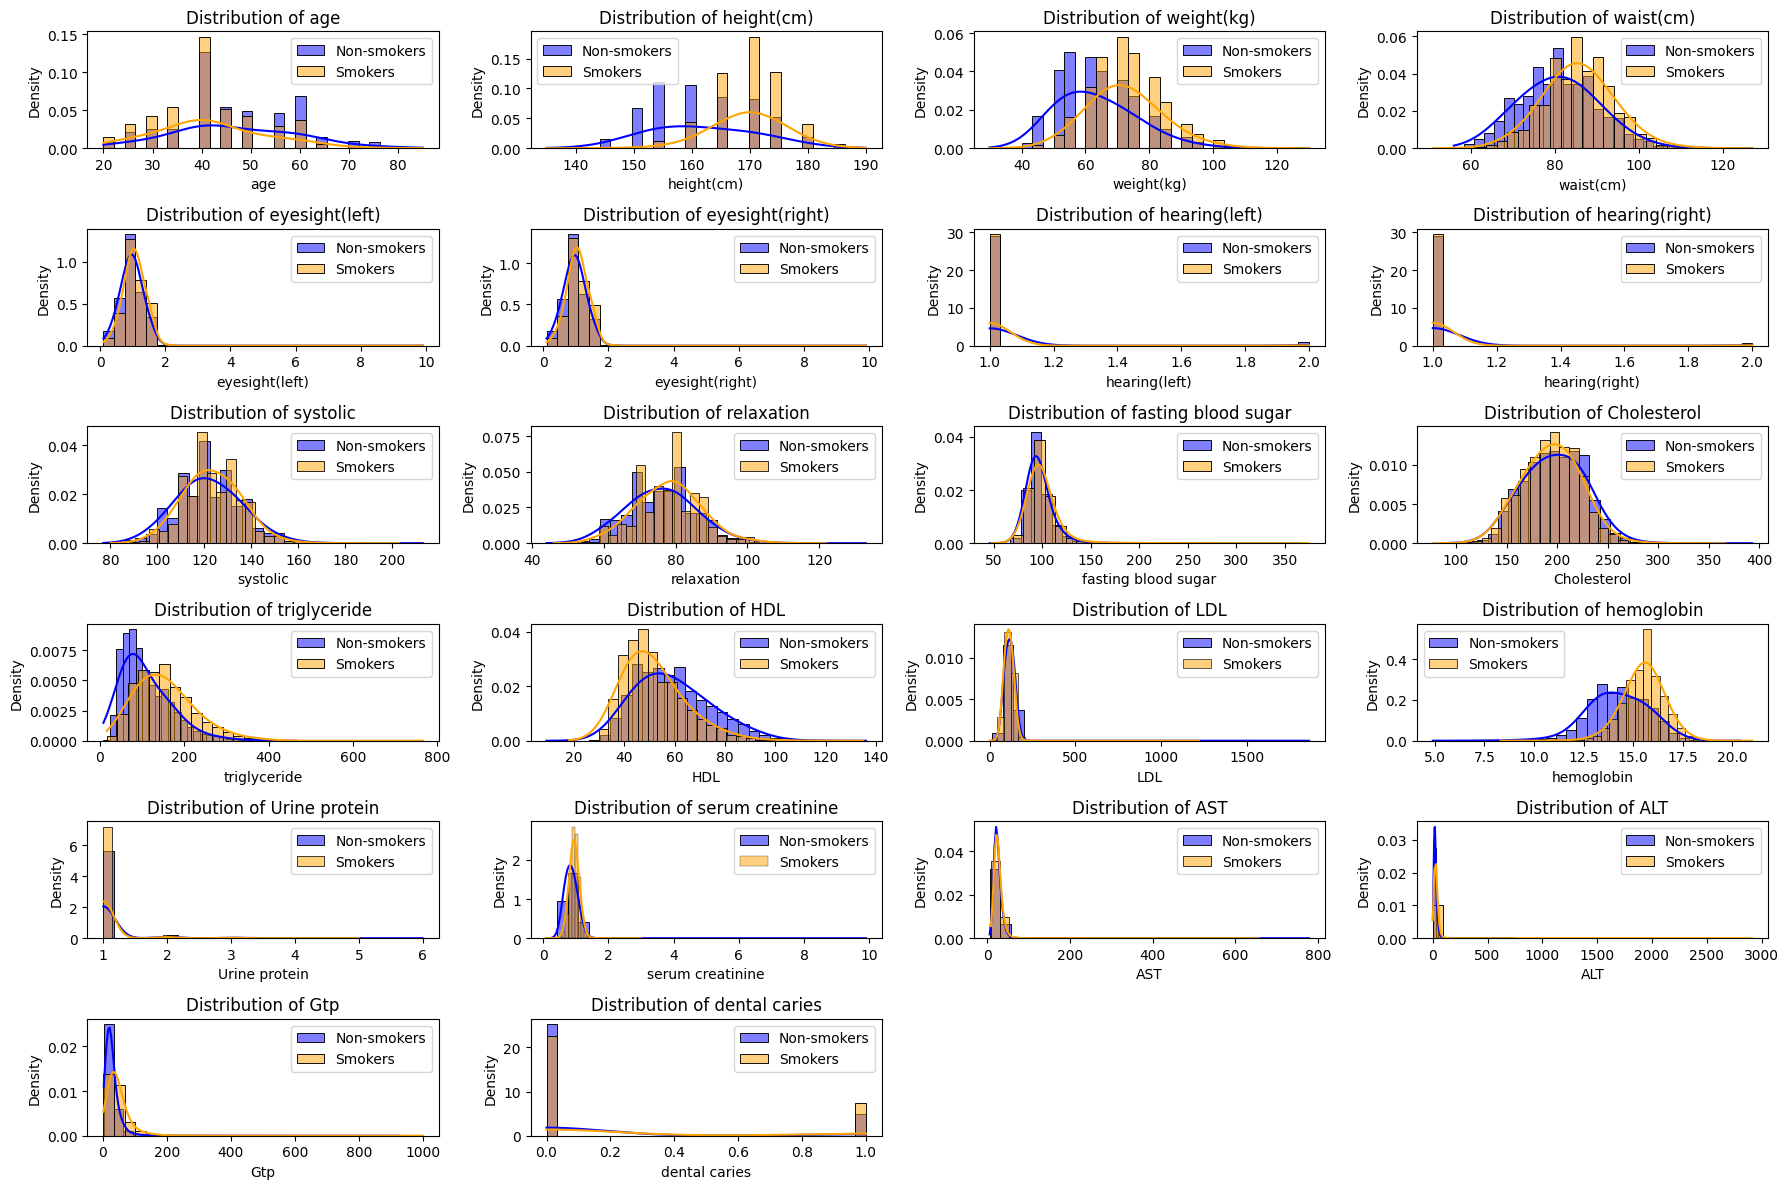

In [ ]:
numerical_features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
                      'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
                      'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
                      'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

# Create subplots
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 4, i)
    sns.histplot(train_data[train_data['smoking'] == 0][feature], bins=30, kde=True, kde_kws={'bw_method': 0.5}, color='blue', label='Non-smokers', stat='density', common_norm=False)
    sns.histplot(train_data[train_data['smoking'] == 1][feature], bins=30, kde=True, kde_kws={'bw_method': 0.5}, color='orange', label='Smokers', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()



CORRELATION

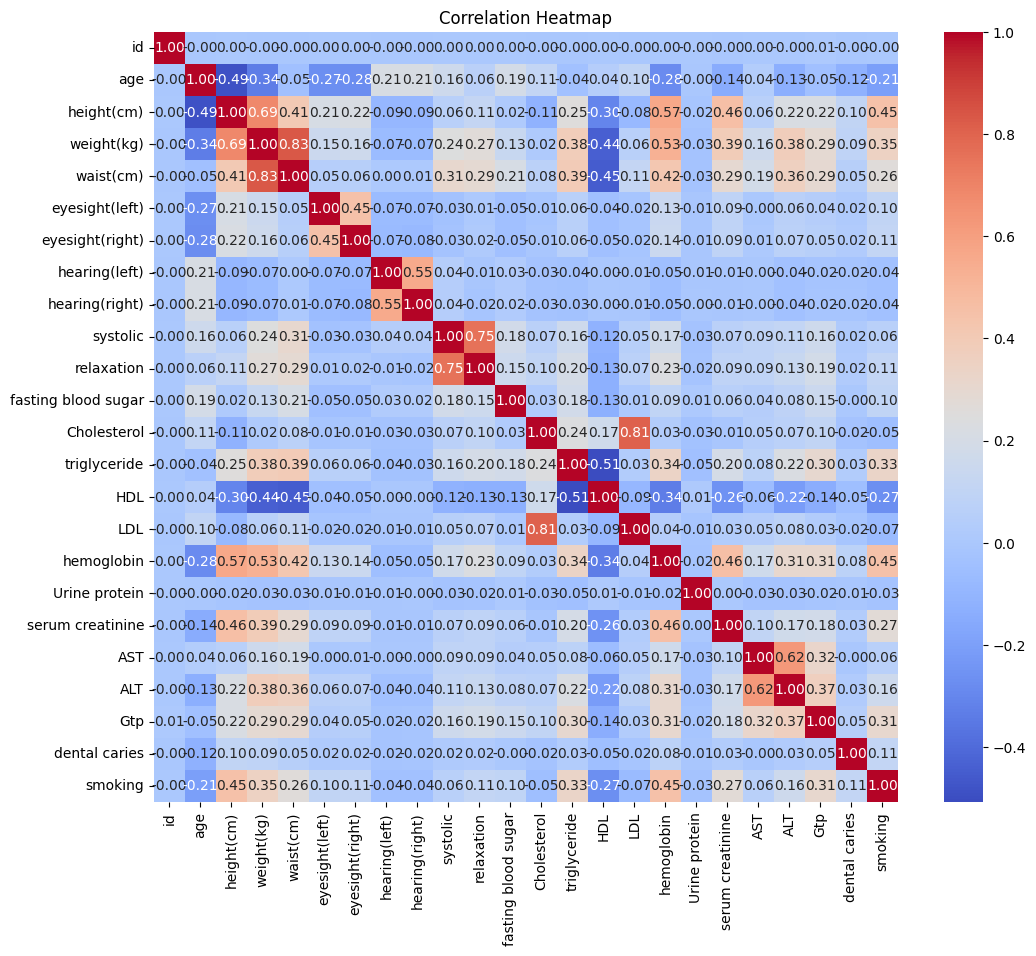

In [ ]:
# Compute correlation matrix
correlation_matrix = train_data.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Looking at the provided correlation matrix, some notable patterns emerge. The variable "smoking" shows positive correlations with several health-related features, such as "height," "weight," "waist," "systolic blood pressure," and "hemoglobin." This suggests that individuals who smoke may exhibit characteristics like higher weight, larger waist circumference, and higher blood pressure.

Conversely, there are negative correlations between "smoking" and certain visual acuity measures like "eyesight (left)" and "eyesight (right)." This implies that smoking might have a negative impact on eyesight. Additionally, there are negative correlations between "smoking" and some blood lipid profiles like "HDL" (high-density lipoprotein) and "LDL" (low-density lipoprotein), indicating potential associations between smoking and lipid metabolism.

It's important to note that correlation does not imply causation, and further statistical analysis or domain-specific knowledge is needed to establish causal relationships between variables.

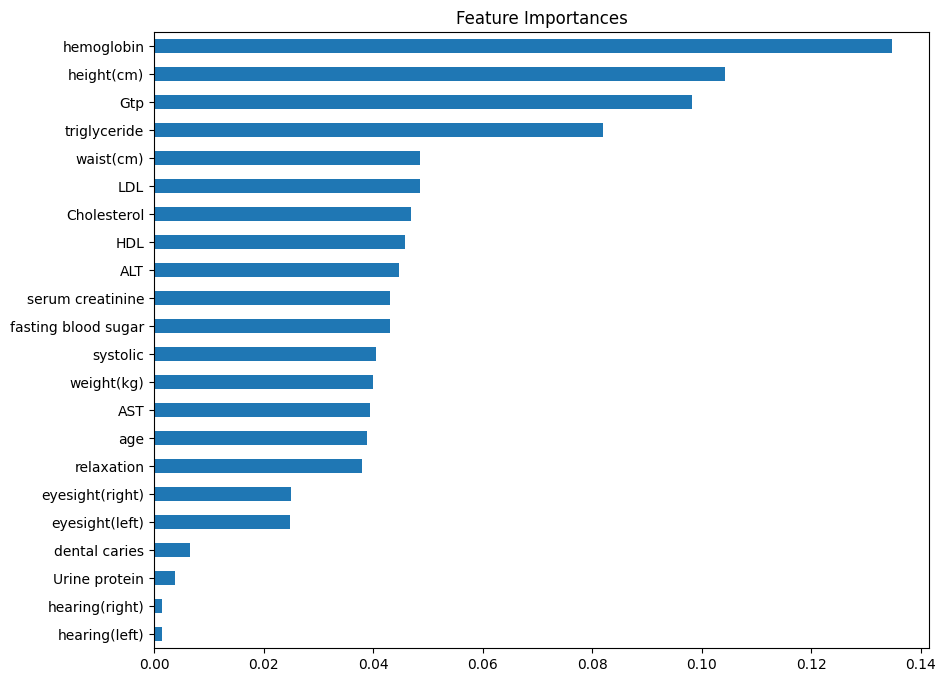

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Using RandomForestClassifier for feature importance
X = train_data.drop(['id', 'smoking'], axis=1)
y = train_data['smoking']

# Fit a RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot feature importances
feature_importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importances')
plt.show()


The feature importances obtained from our RandomForestClassifier offer valuable insights into the factors that contribute most to predicting smoking status in our dataset.

**Hemoglobin** (13.48%):

Hemoglobin levels have the highest importance, indicating an association with smoking status. Elevated or reduced hemoglobin levels may be linked to smoking-related health effects, such as changes in blood oxygen levels.

**Gtp** (9.82%):

Gamma-glutamyl transferase (Gtp) levels also carry significant importance. Elevated Gtp levels are often associated with liver dysfunction, and this importance suggests a potential link between liver health and smoking in our dataset.

**Height** (10.42%) and **Weight** (4.00%):

Both height and weight contribute to predicting smoking status, suggesting a connection between body mass index (BMI) and smoking habits. This aligns with existing literature indicating correlations between smoking and weight-related factors.

**Triglyceride** (8.20%):

Triglyceride levels, a marker of lipid metabolism, are relevant in predicting smoking status. Elevated triglycerides are commonly linked to an increased risk of cardiovascular issues. Therefore, the notable importance of triglycerides in our model implies that smoking might influence the lipid profiles of individuals in our dataset, potentially contributing to cardiovascular health risks.

Age (3.89%):

**Age** contributes modestly to predicting smoking status. This is consistent with the understanding that smoking habits often vary across different age groups.

**Eyesight** (2.47% to 1.55%):

Eyesight measurements have relatively lower importance. This suggests that while sensory health is considered, it may not be as influential in predicting smoking status compared to other factors.

**Urine Protein (0.39%), Hearing (Left and Right - 0.15%):**

Urine protein and hearing measurements have minimal importance, indicating a weaker association with smoking status in our dataset.

Delving into these feature importances not only helps us pinpoint the key factors influencing smoking status prediction but also lays the groundwork for understanding how specific health indicators are affected by smoking in our study population. This valuable insight provides a foundation for targeted interventions and further investigations. Moreover, recognizing these influential features enhances our capabilities to tackle the Kaggle task successfully, where the goal is binary classification to predict a patient's smoking status based on various health indicators.

Exploratory Data Analysis: another way of plotting the features (we'll get rid of one)

---



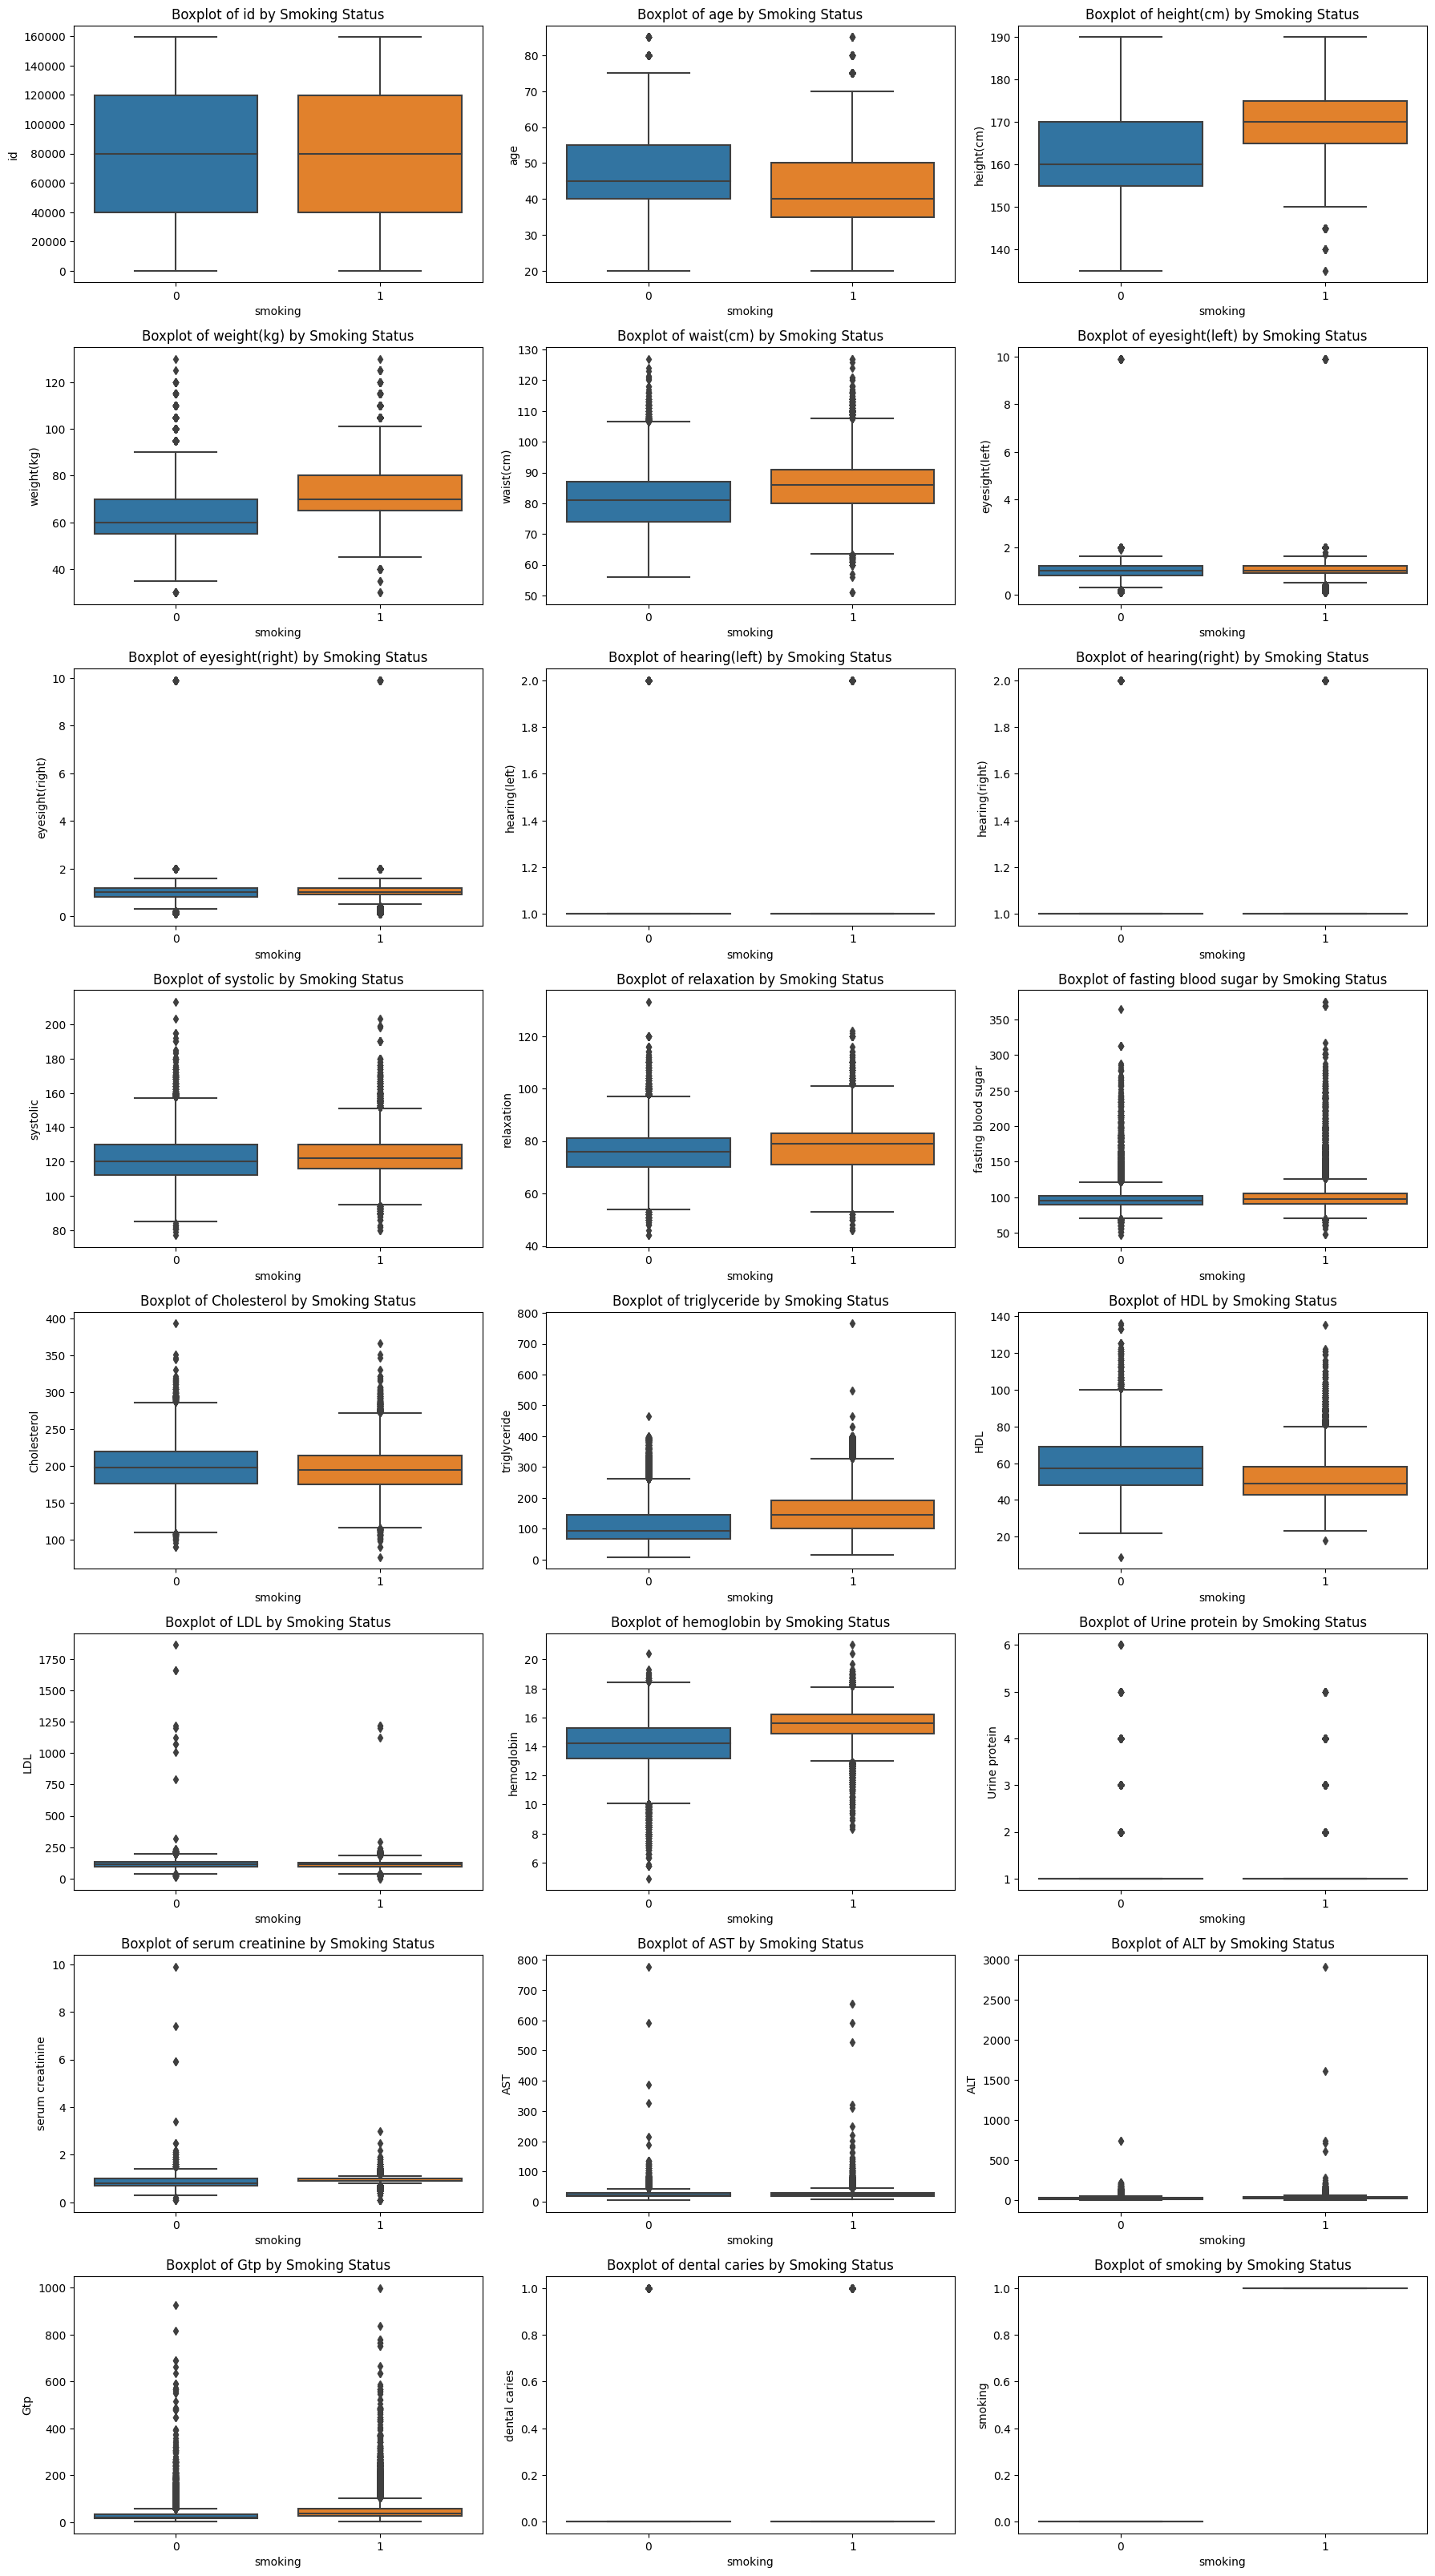

In [ ]:
# Example: Box plots for numerical features
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
num_subplots = len(numerical_features)

plt.figure(figsize=(18, 4 * num_subplots))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_subplots, 3, i)  # Adjust the number of columns as needed
    sns.boxplot(x='smoking', y=feature, data=train_data)
    plt.title(f'Boxplot of {feature} by Smoking Status')
plt.tight_layout()
plt.show()


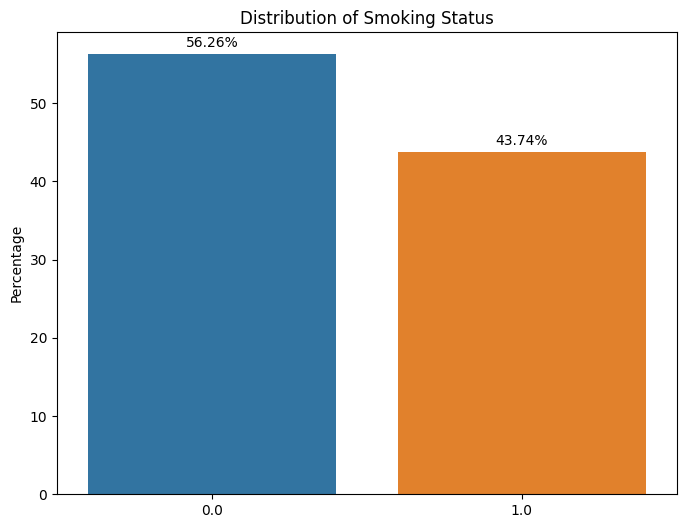

In [ ]:

total = len(train_data)
smoking_percentages = train_data['smoking'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_percentages.index, y=smoking_percentages.values)
plt.title('Distribution of Smoking Status')
plt.ylabel('Percentage')

for i, value in enumerate(smoking_percentages):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

There is no missing values:

In [ ]:
missing_values = train_data.isnull().sum()

missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Series([], dtype: int64)


Preparing data:

In [ ]:
X = train_data.drop(['id', 'smoking'], axis=1)
y = train_data['smoking']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



BASELINE PREDICITON:

In [ ]:
smoking_distribution = train_data['smoking'].value_counts()
majority_class = smoking_distribution.idxmax()
baseline_prediction = pd.DataFrame({'id': test_data['id'], 'smoking': majority_class})
baseline_prediction.to_csv('baseline.csv', index=False)


In [ ]:
files.download('baseline.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**BASELINE**: Score: 0.5, Public score: 0.5

Training the model, evaluating solution:

In [ ]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
test_predictions = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'ROC AUC Score on the test set: {roc_auc:.4f}')

ROC AUC Score on the test set: 0.8530


Making prediction and saving it to a csv file:

In [ ]:
# Make predictions on the actual test set
X_test_final = test_data.drop(['id'], axis=1)
X_test_final_scaled = scaler.transform(X_test_final)
final_predictions = model.predict_proba(X_test_final_scaled)[:, 1]

# Create a submission DataFrame
submission = pd.DataFrame({'id': test_data['id'], 'smoking': final_predictions})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)


Submission file created successfully.


**RANDOM FOREST**: Score: 0.85774, Public score: 0.85829


Getting the file:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mv submission.csv /content/drive/MyDrive/IDS_PROJECT

Mounted at /content/drive


or...

In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [this](https://www.kaggle.com/code/alexryzhkov/lb-0-88048-simple-smoking-ensemble) solution, 3 different kaggle submissions are used ans an ensemble. Similarly, we can use this approach. Combining other people's solutions.

TO DO TO IMPROVE SCORE:


*   Combining features ?
*   Combining existing solutions ?
*   Recall, precision metrics, confusion matrix

